# Exercise No. 1

## Plot histogram for human, rat and plant proteome

In [28]:
from collections import Counter
import csv
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def fasta_file(path, output_file_name):
    """count amino acids within the FASTA document (proteome) 

    Function opens .fasta file and counts all amino acids from all proteins. 
    The counts are saved as a .csv file.

    Args:
        path (string): Where is the .fasta file?
        output_file_name (string): Where should the .csv file be saved and what is the filename?
    """

    as_seq = []                 
    with open(path) as f:
        for line in f:                          # create list of strings 
            as_seq.append(line)   
    
    identifier = []             
    one_string = ""
    
    for i, line in enumerate(as_seq):           # i as index of each line
        line = line.replace("\n","")            # delete \n at the end of each string
        as_seq[i] = line                
        if line.startswith(">"):                # all the identifier lines (start of protein)
            identifier_line = as_seq.pop(i)     
            identifier.append(identifier_line)  # identifier lines are stored in variable identifier
        else:
            one_string += line                  # non identifiers are compressed into one single string 
    
    counts = dict(Counter(one_string))          # counting amino acids and output as dictionary  

    with open(output_file_name, "w", newline='') as output: # writing csv file
        w = csv.writer(output) 
        for row in counts.items():              # each row: key, value
            w.writerow(row)


In [32]:
def plot_hist(path, path_hist, hist_title = ""):
    """plot histogtam of .csv file of dictionary with amino acids counts

    Args:
        path (string): Where is the .csv file?
        path_hist (string): Where should the plot be saved and what is the filename?
        hist_title (string): Title of the histogram
    """
    with open(path) as f:                                   # open .csv file
        reader = csv.reader(f)
        as_counts = dict(reader)                            # change type to dictionary
        for keys in as_counts:
            as_counts[keys] = int(as_counts[keys])          # change data type of counts from strin to integer
        plt.bar(as_counts.keys(), as_counts.values())       # plot histogram
        plt.suptitle(hist_title)                            
        plt.savefig(path_hist, dpi = 400)                # save histogram



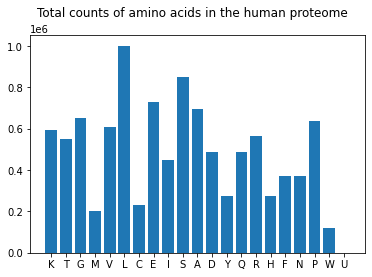

In [26]:
path_fasta = "uniprot-filtered-reviewed_yes+AND+organism__Homo+sapiens+(Human)+[96--.fasta"
path_csv = "human_aminoacids_counts.csv"
path_hist = "human_hist.pdf"
fasta_file(path_fasta, path_csv)
plot_hist(path_csv, path_hist, "Total counts of amino acids in the human proteome")

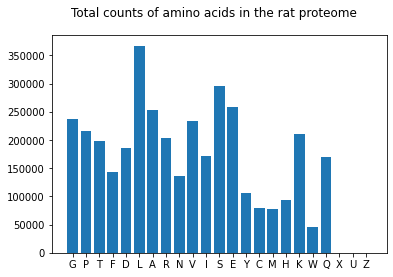

In [39]:
path_fasta = "uniprot-filtered-organism__Rattus+norvegicus+(Rat)+[10116]_+AND+re--.fasta"
path_csv = "rat_aminoacids_counts.csv"

fasta_file(path_fasta, path_csv)
plot_hist(path_csv, path_hist, "Total counts of amino acids in the rat proteome")


NoneType

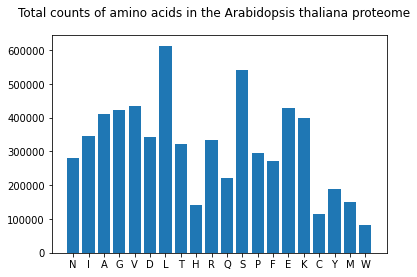

In [47]:
path_fasta = "uniprot-filtered-organism__Arabidopsis+thaliana+(Mouse-ear+cress)+[370--.fasta"
path_csv = "plant_aminoacids_counts.csv"
path_hist = "plant_hist.pdf"

fasta_file(path_fasta, path_csv)
type(plot_hist(path_csv, path_hist, "Total counts of amino acids in the Arabidopsis thaliana proteome"))


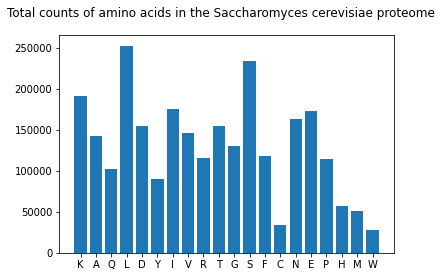

In [46]:
path_fasta = "uniprot-filtered-organism__Saccharomyces+cerevisiae+(strain+ATCC+204508+%2--.fasta"
path_csv = "fungi_aminoacids_counts.csv"
path_hist = "fungi_hist.pdf"

fasta_file(path_fasta, path_csv)
plot_hist(path_csv, path_hist, "Total counts of amino acids in the Saccharomyces cerevisiae proteome")

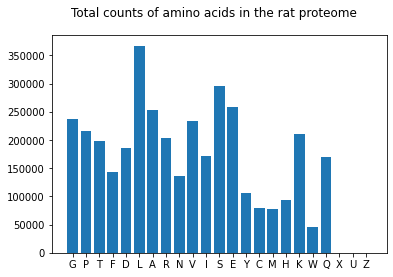

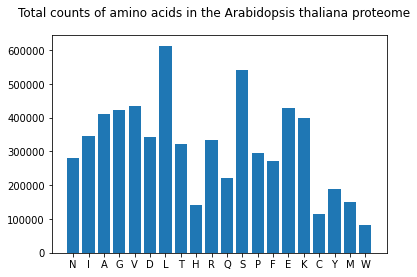

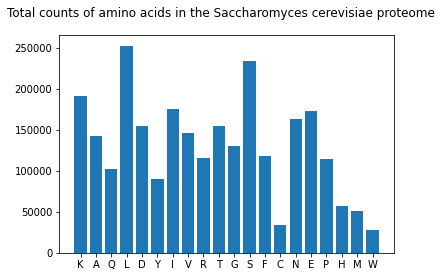

In [50]:
pp = PdfPages('kingdoms.pdf')

def retFig(csv_file, title):
    with open(csv_file) as f:                                   # open .csv file
        reader = csv.reader(f)
        as_counts = dict(reader)                            # change type to dictionary
        for keys in as_counts:
            as_counts[keys] = int(as_counts[keys])          # change data type of counts from strin to integer
        fig = plt.figure()
        a= plt.bar(as_counts.keys(), as_counts.values())       # plot histogram    
        b = plt.suptitle(title)                        
        return fig
fig1 = retFig("rat_aminoacids_counts.csv", "Total counts of amino acids in the rat proteome")
fig2 = retFig("plant_aminoacids_counts.csv", "Total counts of amino acids in the Arabidopsis thaliana proteome")
fig3 = retFig("fungi_aminoacids_counts.csv", "Total counts of amino acids in the Saccharomyces cerevisiae proteome")

pp = PdfPages('kingdoms.pdf')
pp.savefig(fig1)
pp.savefig(fig2)
pp.savefig(fig3)
pp.close()

## proteins

In [7]:
def proteins(path, out = "Proteins"):
    """generating a list of string of protein sequences 

    First generates one tring consisting of protein sequences for entire genome 
    but each protein is seperated through '|'.
    It can be decided whether you want a list of protein sequences
    or only the descriptions for the proteins as output.

    Args:
        path (string): [description]
        out (str, optional):    Decide which output: "Proteins" gives out the protein sequences as string, 
                                "Protein_identifiers" returns the description as given in the identifier lines for each protein.
                                Defaults to "Proteins".

    Returns:
        if out == "Proteins": 
            list: list of strings (protein sequences)
        if out == "Protein_identifiers":
            list: list of strings (description of each protein)
        
    """
    as_seq = []                 
    with open(path) as f:
        for line in f:                          # create list of strings 
            as_seq.append(line)   

    one_string = ""
    protein_identifier = []
    for i, line in enumerate(as_seq):           # i as index of each line
        line = line.replace("\n","")            # delete \n at the end of each string
        if line.startswith(">"):                # all the identifier lines (start of protein)
            one_string += "|"                   # "|" marks where protein starts/ends
            line = line.replace(">","")         # delete ">" from identifier 
            protein_identifier.append(line)     # store identifier for each protein in variable
        else:
            one_string += line                  # all other lines (protein sequences) are compressed into one string

    if out == "Proteins":                       
        return one_string.split("|")[1::]       # string cut at '|'; first element ("") of list removed
    elif out == "Protein_identifiers":
        return protein_identifier




In [12]:
human_proteins = proteins("uniprot-filtered-reviewed_yes+AND+organism__Homo+sapiens+(Human)+[96--.fasta")
human_proteins_identifier = proteins("uniprot-filtered-reviewed_yes+AND+organism__Homo+sapiens+(Human)+[96--.fasta", "Protein_identifiers")
rat_proteins = proteins("uniprot-filtered-organism__Rattus+norvegicus+(Rat)+[10116]_+AND+re--.fasta")
rat_proteins_identifier = proteins("uniprot-filtered-organism__Rattus+norvegicus+(Rat)+[10116]_+AND+re--.fasta", "Protein_identifiers")

### lowest/highest pI

In [10]:
# what is pI?

### longest/shortest proteins

In [13]:
a = rat_proteins_identifier[rat_proteins.index(max(rat_proteins, key = len))]
b = len(max(rat_proteins, key = len))

print("longest protein: {0:>} \nlength: {1}".format(a,b))

longest protein: sp|D3ZHV2|MACF1_RAT Microtubule-actin cross-linking factor 1 OS=Rattus norvegicus OX=10116 GN=Macf1 PE=1 SV=1 
length: 5430


In [14]:
a = rat_proteins_identifier[rat_proteins.index(min(rat_proteins, key = len))]
b = len(min(rat_proteins, key = len))

print("shortess protein: {0:>} \nlength: {1}".format(a,b))

shortess protein: sp|P56576|UH11_RAT Unknown protein from spot P11 of 2D-PAGE of heart tissue (Fragment) OS=Rattus norvegicus OX=10116 PE=1 SV=1 
length: 7


### highest density

- density = mass / amino acid counts

In [15]:
# How can I know the mass of proteins?

### most hydrophobic/hydrophilic protein

In [20]:
human_protein_counts = [dict(Counter(x)) for x in human_proteins]

In [23]:
# most hydrophilic:
# - more amino acids with polar side chain (S, T, Y, N, Q, C)
# most hydrophobic: 
# - more amino acids with non-polar side chains (A, V, M, W, L, I, P, F, G)

keys_polar = ["S", "T", "Y", "N", "Q", "C"]
keys_nonpolar = ["A", "V", "M", "W", "L", "I", "P", "F", "G"]

hydro = []

for i in range(len(human_protein_counts)):
    hydrophilic = sum(filter(None, [human_protein_counts[i].get(key) for key in keys_polar]))
    hydrophobic = sum(filter(None, [human_protein_counts[i].get(key) for key in keys_nonpolar]))

    if hydrophilic > hydrophobic: hydro.append([hydrophilic, "hydrophilic"])
    elif hydrophilic < hydrophobic: hydro.append([hydrophobic, "hydrophobic"])
    else: hydro.append([0, "not clear"])


In [24]:
hydrophilic_protein = hydro.index([max([l[0] for l in hydro if l[1] == "hydrophilic"]), "hydrophilic"])
hydrophobic_protein = hydro.index([max([l[0] for l in hydro if l[1] == "hydrophobic"]), "hydrophobic"])
print("most hydrophilic protein: {0} \nmost hydrophobic protein: {1}".format(human_proteins_identifier[hydrophilic_protein], human_proteins_identifier[hydrophobic_protein]))


most hydrophilic protein: sp|Q8WXI7|MUC16_HUMAN Mucin-16 OS=Homo sapiens OX=9606 GN=MUC16 PE=1 SV=3 
most hydrophobic protein: sp|Q8WZ42|TITIN_HUMAN Titin OS=Homo sapiens OX=9606 GN=TTN PE=1 SV=4
